In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

<h2>
    Loading the Boston Housing Dataset.
</h2>

In [2]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<h2>
    Filling the Null Values.
</h2>

In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.ffill(inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<h2>
    Splitting the data into features and target.
</h2>

In [6]:
# Features and target
X = df.drop("MEDV", axis=1)   # medv = target column
y = df["MEDV"]

<h2>
    Normalizing the data.
</h2>

In [7]:
# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h2>
    Splitting the data into Train and Test.
</h2>

In [8]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h2>
    Building the model.
</h2>

In [9]:
# Step 4: Build the Deep Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Linear activation for regression
])

C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

<h2>
    Training the model.
</h2>

In [11]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 550.1050 - mae: 21.5870 - val_loss: 541.4626 - val_mae: 21.7802
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 545.8535 - mae: 21.5201 - val_loss: 491.2812 - val_mae: 20.7001
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 509.3152 - mae: 20.5518 - val_loss: 431.9133 - val_mae: 19.3288
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 418.6367 - mae: 18.5896 - val_loss: 358.2169 - val_mae: 17.4711
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 366.8458 - mae: 17.1141 - val_loss: 269.8713 - val_mae: 14.9447
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 267.5256 - mae: 14.2066 - val_loss: 181.7105 - val_mae: 11.9320
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 169.1894 - mae: 10.8681 - val_loss: 109.8468 - val_mae: 8.7688
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 104.6509 - mae: 8.1190 - val_loss: 67.9543 - val_mae: 6.1278
Epoch 9/50
12/12 ━━━━━━━━━━

<h2>
    Evaluating the model.
</h2>

In [12]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Test MAE: {mae:.2f}")

4/4 - 0s - 14ms/step - loss: 14.5839 - mae: 2.5148
Test MAE: 2.51


In [16]:
preds = model.predict(X_test[::5])
print("Index | Predicted | Actual")
print("----------------------------")
for i in range(len(preds)):
    print(f"{i:5d} | {preds[i][0]:9.2f} | {y_test.iloc[i]:6.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Index | Predicted | Actual
----------------------------
    0 |     27.59 |  23.60
    1 |     20.44 |  32.40
    2 |     21.49 |  13.60
    3 |     22.07 |  22.80
    4 |     22.76 |  16.10
    5 |     17.84 |  20.00
    6 |     21.75 |  17.80
    7 |     16.32 |  14.00
    8 |     13.95 |  19.60
    9 |     17.85 |  16.80
   10 |     18.43 |  21.50
   11 |     22.76 |  18.90
   12 |     22.12 |   7.00
   13 |     15.37 |  21.20
   14 |     21.00 |  18.50
   15 |      4.74 |  29.80
   16 |     20.63 |  18.80
   17 |     28.86 |  10.20
   18 |     23.28 |  50.00
   19 |     20.14 |  14.10
   20 |     22.65 |  25.20


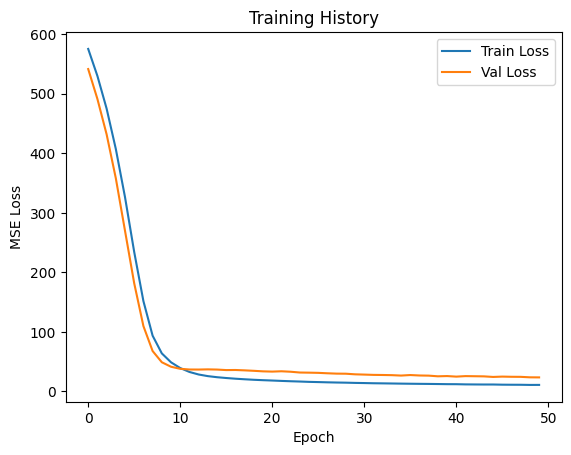

In [17]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training History')
plt.show()